<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/SVM_Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

Las SVM se encuentran entre los mejores algoritmos de aprendizaje supervisado "listos para usar". La historia de SVM, empieza primero con la idea de los márgenes y  de separar datos con una "brecha" grande. A continuación, se habla del clasificador de margen óptimo, lo que nos lleva a una formulación sobre la dualidad de Lagrange. También veremos kernels, que brindan una forma de aplicar SVM de manera eficiente en dimensiones muy altas (infinitas) del espacio de características.

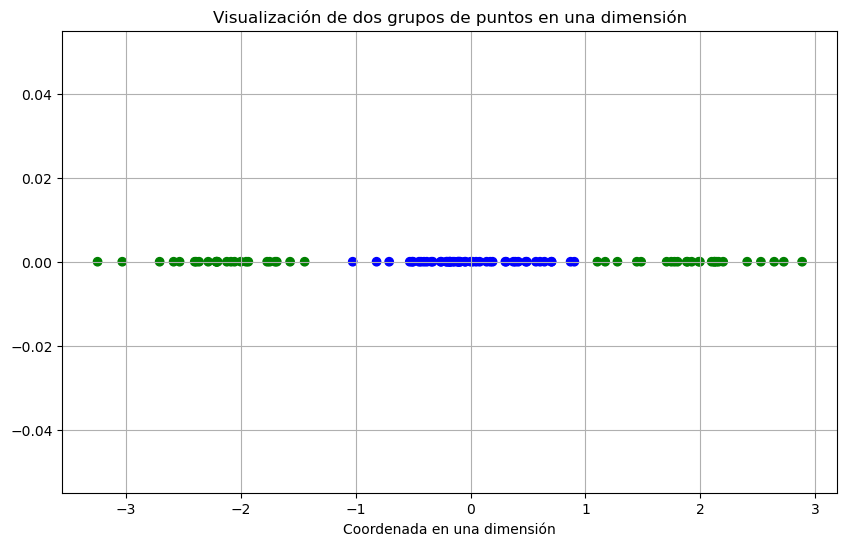

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generar puntos para el grupo 1 en la parte central
group1 = np.random.normal(loc=0, scale=0.5, size=50)
# Generar puntos para el grupo 2 a los lados del grupo 1
group2 =np.hstack( (np.random.normal(loc=-2, scale=0.5, size=25), np.random.normal(loc=2, scale=0.5, size=25)))
# Concatenar los puntos de los dos grupos
points = np.concatenate([group1, group2])
# Etiquetas para los puntos
labels = np.concatenate([np.zeros(50), np.ones(50)])
# Colores para los puntos según sus etiquetas
colors = {0: 'blue', 1: 'green'}
# Visualización de los puntos en una sola dimensión
plt.figure(figsize=(10, 6))
plt.scatter(points, np.zeros_like(points), c=[colors[label] for label in labels], marker='o')
plt.title('Visualización de dos grupos de puntos en una dimensión')
plt.xlabel('Coordenada en una dimensión')

plt.grid(True)



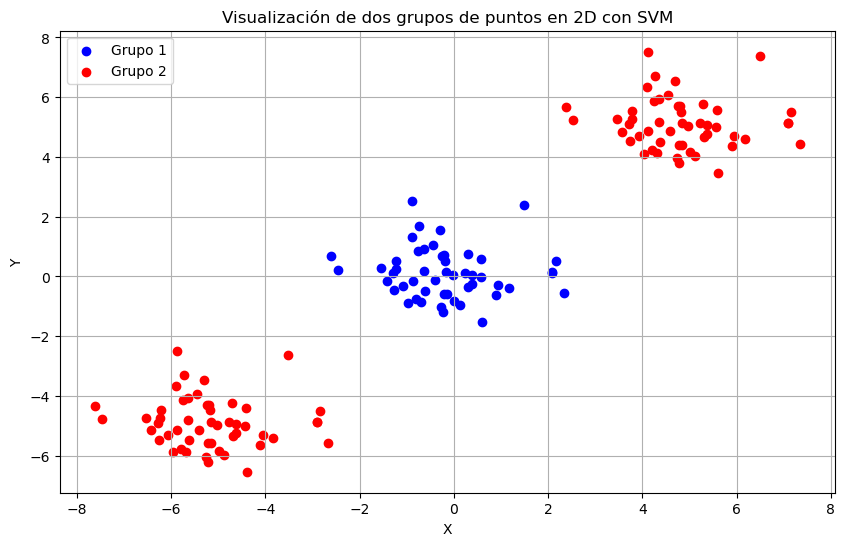

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generar puntos del grupo 1 en el centro
center_points = np.random.randn(50, 2)

# Generar puntos del grupo 2 a los lados
side_points1 = center_points + np.array([5, 5])
side_points2 = center_points + np.array([-5, -5])

# Combinar los puntos de ambos grupos
X = np.vstack([center_points, side_points1, side_points2])
y = np.hstack([np.zeros(50), np.ones(50), np.ones(50) * 2])
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.show()


### Experimento 1: let's try a linear kernel

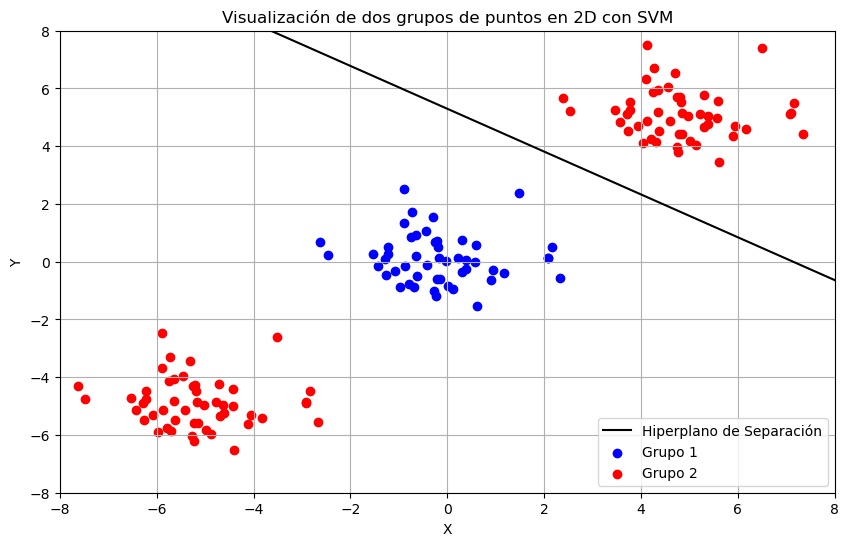

In [21]:
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


# Entrenar un clasificador SVM
clf = SVC(kernel='linear')
clf.fit(X, y)

# Obtener el hiperplano de separación
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot del hiperplano de separación
plt.plot(xx, yy, 'k-', label='Hiperplano de Separación')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.axis([-8,8,-8,8])
plt.show()

### Ejercicio 1 (Gaussian kernel)

Considere dos muestras, $(x^i,y^i)$ y $(x^j,y^j)$, con vectores de entrada $x$ con $n$ atributos. El Gaussian kernel se define como:


$K(x^i,x^j)= exp\left(-\frac{|x^i-x^j|^2}{2\sigma^ 2}\right) = exp\left(-\frac{\sum_{k=1} ^ n (x^i _k-x^j _k)^2}{2\sigma^2}\right)$


El parametro $\sigma$ controla la velocidad de decaimiento cuando los  vectores $x^i$ y $x^j$ se apartan. Usualmente se usa la notación  $\gamma=\frac{1}{2\sigma^ 2}$.

Implemente una función que calcule el Gaussian Kernel, debe recibir dos vectores de atributos y un parámetro $\sigma$


Una vez que haya completado la función gaussianKernel, la siguiente celda probará la función de su kernel en dos ejemplos proporcionados y debería ver un valor de:

    1. 0.44485   if the input is one dimensional
    2. 0.286504  if the input is two dimensional

In [22]:
def gaussianKernel(x1, x2, sigma):
    # Calcula la diferencia entre los vectores de entrada
    diff = x1 - x2
    # Calcula la norma al cuadrado de la diferencia
    norm_squared = np.sum(diff**2)
    sigma_squared = sigma**2

    # Calcula el kernel gaussiano
    kernel_value = np.exp(-norm_squared / (2 * sigma_squared))

    return kernel_value



No handles with labels found to put in legend.


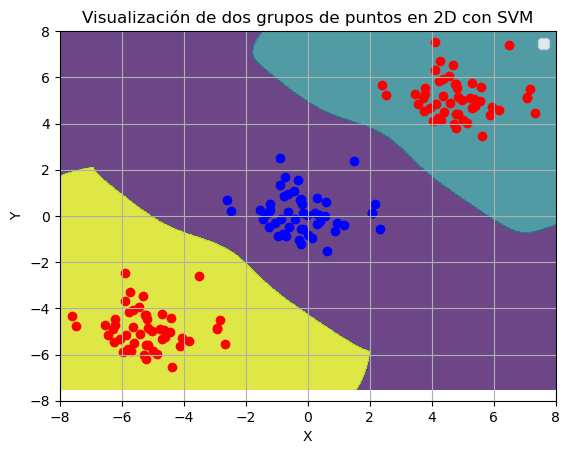

In [23]:
def custom_kernel(sigma):
    def kernel(X, Y):
        # Kernel RBF personalizado con sigma
        return np.exp(-np.linalg.norm(X[:, np.newaxis] - Y, axis=2) ** 2 / (2 * sigma ** 2))
    return kernel

# Crear el modelo con kernel personalizado
sigma_value = 1.0
clf = SVC(kernel=custom_kernel(sigma_value))

# Entrenar el modelo
clf.fit(X, y)

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
# Visualize data points
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')
plt.grid(True)
plt.axis([-8,8,-8,8])
plt.show()



In [24]:
def visualize_gaussian_kernel(x1, x2, sigmas):
    plt.figure(figsize=(10, 6))

    if(len(x2)==2):
      x2_values = np.linspace(x2[0] - 2, x2[0] + 2, 100)  # Adjust range as needed
    else:
      x2_values = x2  # Adjust range as needed

    for sigma in sigmas:
        K_values = [gaussianKernel(x1, x2_val, sigma) for x2_val in x2_values] # Calculate K for each x2_val
        plt.plot(x2_values, K_values, label=f'sigma = {sigma}')  # Plot x2_values against K_values

    plt.xlabel('x2')
    plt.ylabel('K(x1, x2)')
    plt.title('Influencia de sigma en el Kernel Gaussiano')
    plt.legend()
    plt.grid(True)
    plt.show()

In [25]:
x1 = -2.1
x2 = -1.2
sigma = 1;
K = gaussianKernel(x1, x2, sigma)
print('one dimension:', K)

x1 = np.array([1, 1])
x2 = np.array([1.5, 2])
sigma = 1;
K = gaussianKernel(x1, x2, sigma)
print('two dimension:', K)

one dimension: 0.6669768108584743
two dimension: 0.5352614285189903


Explore cómo afecta el valor de $\sigma$ cuando hay puntos cerca o muy separados.

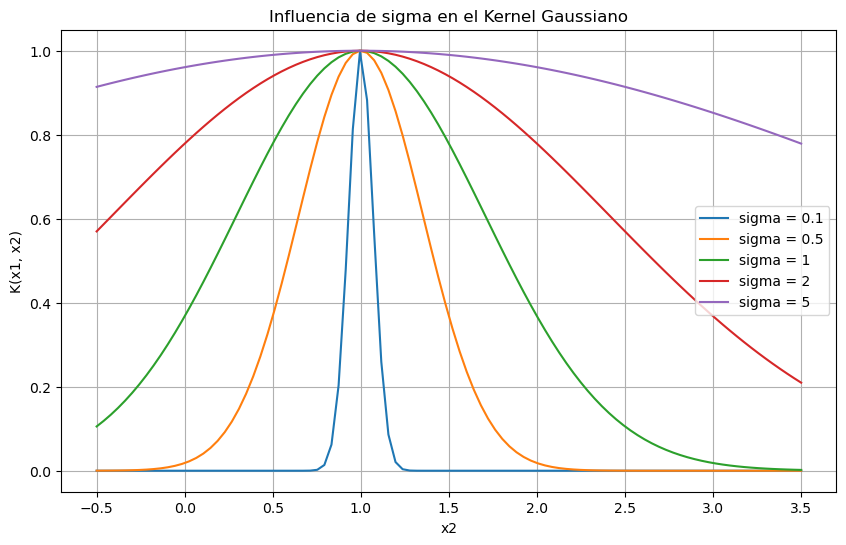

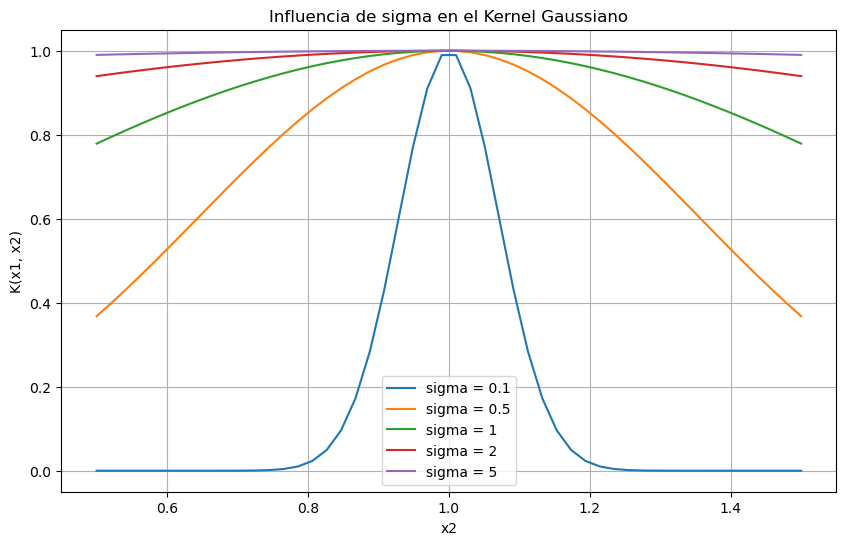

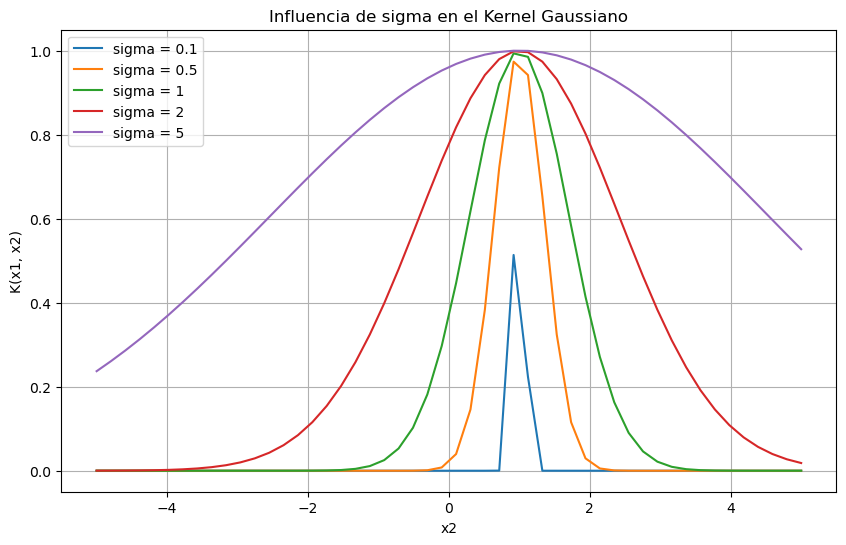

In [26]:
# Explore cómo afecta el valor de  σ  cuando hay puntos cerca o muy separados.
#Explora diferentes valores sigma
sigmas = [0.1, 0.5, 1, 2, 5]
x1 = np.array([1,1]) #Fixed point
x2 = np.array([1.5, 2])
visualize_gaussian_kernel(x1, x2, sigmas)

#Ejemplo con puntos muy juntos
x1_close = np.array([1, 1])
x2_close = np.linspace(0.5, 1.5, 50)
visualize_gaussian_kernel(x1_close, x2_close, sigmas)

# Ejemplo con puntos muy separados
x1_far = np.array([1, 1])
x2_far = np.linspace(-5, 5, 50)
visualize_gaussian_kernel(x1_far, x2_far, sigmas)

### Conclusiones sobre el comportamiento del kernel gaussiano

A partir de las gráficas generadas, podemos observar lo siguiente sobre el comportamiento de la función de kernel gaussiana en relación con el parámetro $\sigma$:

1. **Valores pequeños de $\sigma$**:
    - Cuando $\sigma$ es pequeño, la función de kernel gaussiana decae rápidamente. Esto significa que solo los puntos muy cercanos entre sí tendrán un valor de kernel significativo.
    - En las gráficas, esto se observa como curvas que caen abruptamente a medida que los puntos se alejan del punto de referencia $x1$.
    - Este comportamiento es útil cuando queremos que el modelo sea muy sensible a las diferencias locales en los datos.

2. **Valores grandes de $\sigma$**:
    - Cuando $\sigma$ es grande, la función de kernel gaussiana decae más lentamente. Esto significa que incluso los puntos que están más alejados entre sí tendrán un valor de kernel significativo.
    - En las gráficas, esto se observa como curvas que descienden más suavemente y permanecen elevadas en un rango más amplio de valores de $x2$.
    - Este comportamiento es útil cuando queremos que el modelo tenga en cuenta relaciones más globales en los datos.

3. **Puntos cercanos vs. puntos separados**:
    - Para puntos muy cercanos, los valores de kernel son altos independientemente del valor de $\sigma$, pero la rapidez con la que decae el valor del kernel depende de $\sigma$.
    - Para puntos muy separados, los valores de kernel son bajos para valores pequeños de $\sigma$ y más altos para valores grandes de $\sigma$.

En resumen, el parámetro $\sigma$ controla la sensibilidad del kernel gaussiano a las distancias entre puntos. Un $\sigma$ pequeño hace que el kernel sea más local, mientras que un $\sigma$ grande hace que el kernel sea más global.